# Banking Project 
### Project Info :

Given a real time data set of a marketing campaign run by a Portuguese Bank to sell term deposits to its prospective customers . 

Term deposits serve as a significant revenue stream for banks, representing cash investments held within financial institutions. These investments involve committing funds for a predetermined period, during which they accrue interest at an agreed-upon rate. To promote term deposits, banks employ various outreach strategies including email marketing, advertisements, telephonic marketing, and digital marketing.

### About the Data 

Despite the advent of digital channels, telephonic marketing campaigns persist as one of the most effective means of engaging customers. 

However, they necessitate substantial investment due to the requirement of large call centers to execute these campaigns. Therefore, it becomes essential to pre-identify potential customers likely to convert, enabling targeted outreach efforts via phone calls.
The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit (variable y).

The data is related to the direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed by the customer or not.


In [1]:
# libraries 
import pandas as pd 
pd.set_option("Display.max_columns", None)
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
dataframe = pd.read_csv('banking_data.csv')
dataframe

,age,job,marital,marital_status,education,default,balance,housing,loan,contact,day,month,day_month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,married,tertiary,no,2143,yes,no,unknown,5,may,5-May,261,1,-1,0,unknown,no
1,44,technician,single,single,secondary,no,29,yes,no,unknown,5,may,5-May,151,1,-1,0,unknown,no
2,33,entrepreneur,married,married,secondary,no,2,yes,yes,unknown,5,may,5-May,76,1,-1,0,unknown,no
3,47,blue-collar,married,married,unknown,no,1506,yes,no,unknown,5,may,5-May,92,1,-1,0,unknown,no
4,33,unknown,single,single,unknown,no,1,no,no,unknown,5,may,5-May,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45211,29,management,single,single,tertiary,no,765,no,no,cellular,16,nov,16-Nov,238,1,-1,0,unknown,yes
45212,68,retired,married,married,secondary,no,1146,no,no,cellular,16,nov,16-Nov,212,1,187,6,success,yes
45213,53,management,married,married,tertiary,no,583,no,no,cellular,17,nov,17-Nov,226,1,184,4,success,yes
45214,73,retired,married,married,secondary,no,2850,no,no,cellular,17,nov,17-Nov,300,1,40,8,failure,yes


### Question 1 : What is the distribution of age among the clients ? 

In [3]:
# checking the distribution of age among the clients 
dataframe['age']

0        58
1        44
2        33
3        47
4        33
         ..
45211    29
45212    68
45213    53
45214    73
45215    71
Name: age, Length: 45216, dtype: int64

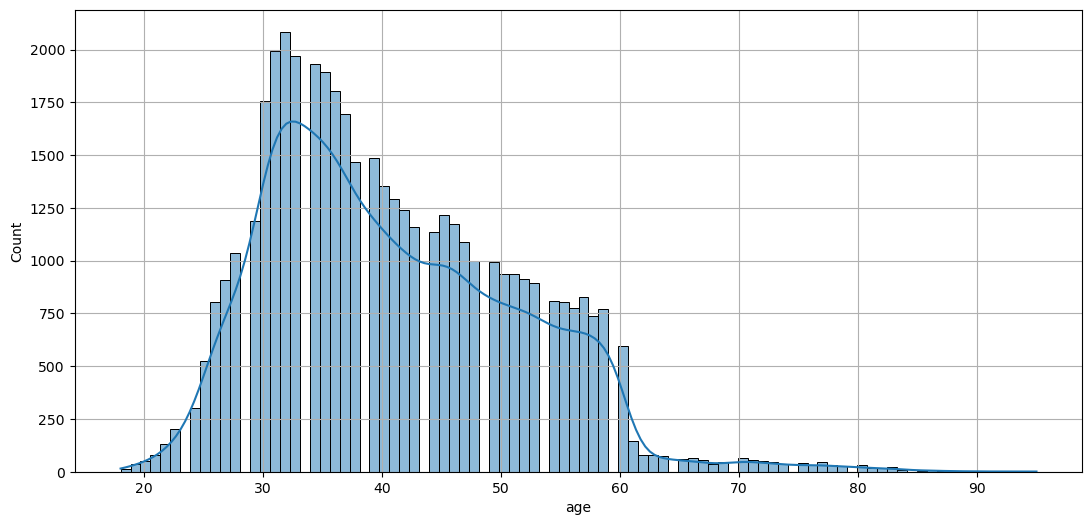

In [35]:
plt.figure(figsize=[13,6])
plt.grid()
sns.histplot(data=dataframe, x='age', kde=True); 

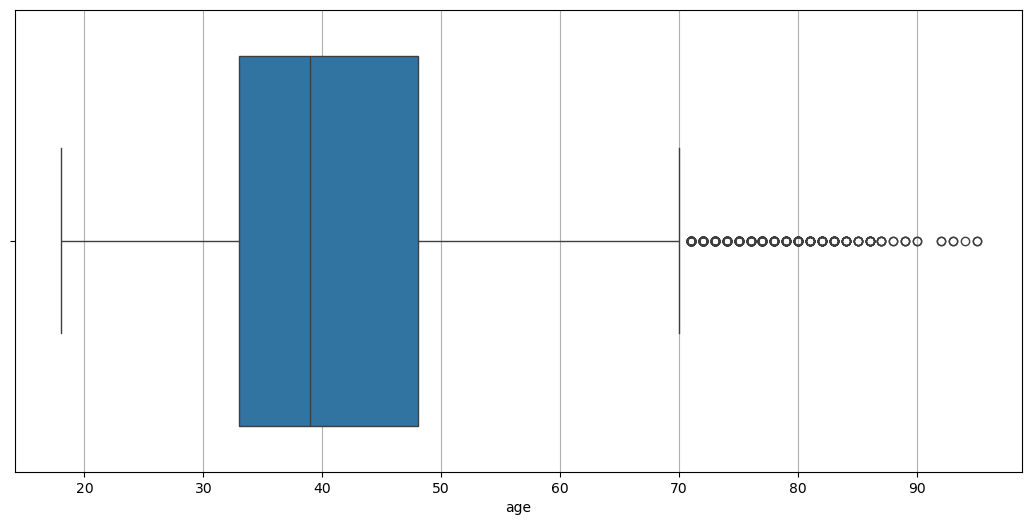

In [12]:
plt.figure(figsize=[13,6])
plt.grid()
sns.boxplot(data=dataframe, x='age'); 

In [14]:
dataframe['age'].describe()

count    45216.000000
mean        40.938186
std         10.621249
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

#### Inference : 
* Majority of the clents lie between the ages of 30 - 55
* 1st quartile = 33
* 3rd quartile = 48
* Mean = 39
* Outliers starting after the age of 70

### Question 2 : How does the job type vary among the clients ? 

In [17]:
# Investigating the 'job' column

dataframe['job']

0          management
1          technician
2        entrepreneur
3         blue-collar
4             unknown
             ...     
45211      management
45212         retired
45213      management
45214         retired
45215         retired
Name: job, Length: 45216, dtype: object

In [19]:
print(f"Number of unique job types : {dataframe['job'].nunique()}")

Number of unique job types : 12


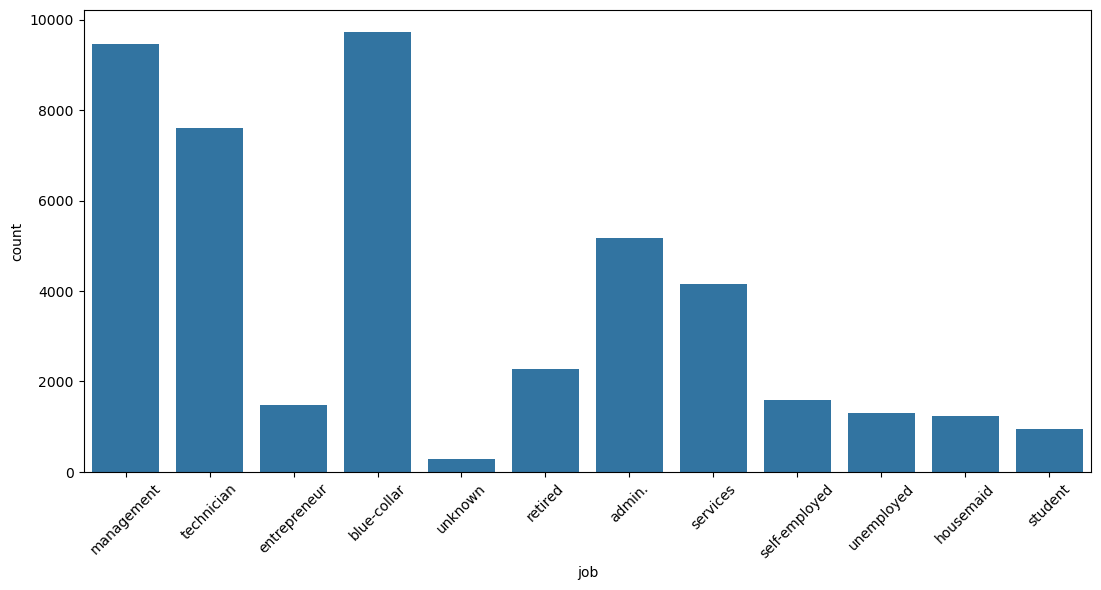

In [39]:
plt.figure(figsize=[13, 6])
sns.countplot(data=dataframe, x='job');
plt.xticks(rotation=45); 

In [36]:
dataframe['job'].value_counts()

job
blue-collar      9732
management       9460
technician       7597
admin.           5171
services         4154
retired          2267
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

#### Inference 
There are 12 distinctions in the 'job' column  . 
* 'blue-collar' , 'management' and 'technician' job types share the majority of the distribution
* 'retired', 'entrepreneur' and 'self-employed' clients have a significant share

### Question 3 : What is the marital status distribution of the clients ? 

In [40]:
# Investigating the marital status distribution amongst the clients 
dataframe['marital_status']

0         married
1          single
2         married
3         married
4          single
           ...   
45211      single
45212     married
45213     married
45214     married
45215    divorced
Name: marital_status, Length: 45216, dtype: object

In [41]:
dataframe['marital_status'].value_counts()

marital_status
married     27216
single      12790
divorced     5207
Name: count, dtype: int64

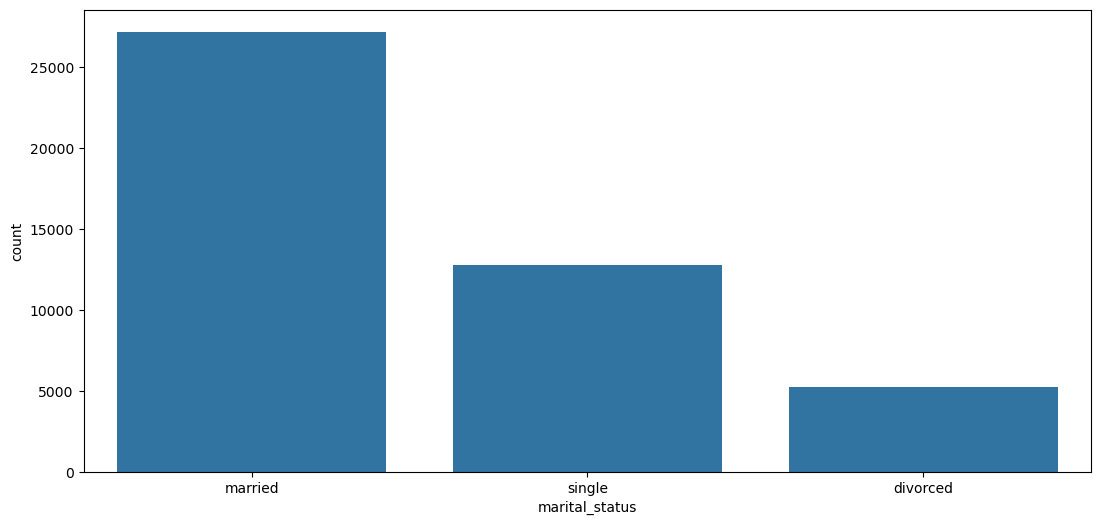

In [43]:
plt.figure(figsize=[13, 6])
sns.countplot(data=dataframe, x='marital_status'); 

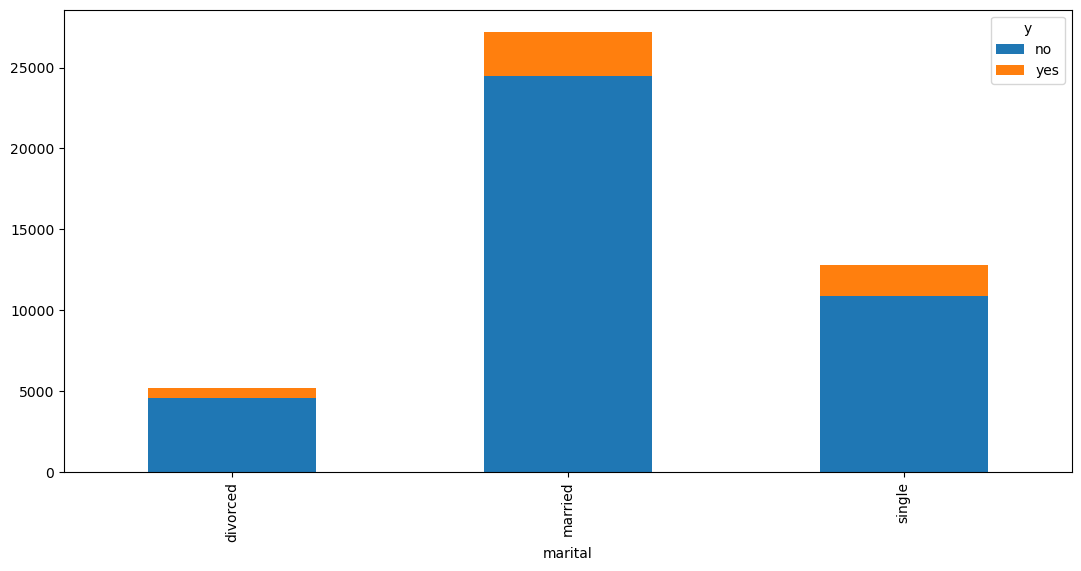

In [232]:
grouped = dataframe.groupby('marital')['y'].value_counts().unstack()
grouped.plot(kind='bar', stacked=True, figsize=[13, 6]); 

In [233]:
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100
percentages

y,no,yes
marital,,
divorced,88.035337,11.964663
married,89.866255,10.133745
single,85.043002,14.956998


#### Inference 
Marital status distribution of the clients : 
* Majority of the clients are married
* Least count seen amongst divorced clients

### Question 4 : What is the level of education among the clients ? 

In [45]:
# Investigating the 'education' column 
dataframe['education']

0         tertiary
1        secondary
2        secondary
3          unknown
4          unknown
           ...    
45211     tertiary
45212    secondary
45213     tertiary
45214    secondary
45215      primary
Name: education, Length: 45216, dtype: object

In [47]:
print(f"Unique categories for the 'education' column : {dataframe['education'].nunique()}")

Unique categories for the 'education' column : 4


In [48]:
dataframe['education'].value_counts()

education
secondary    23204
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

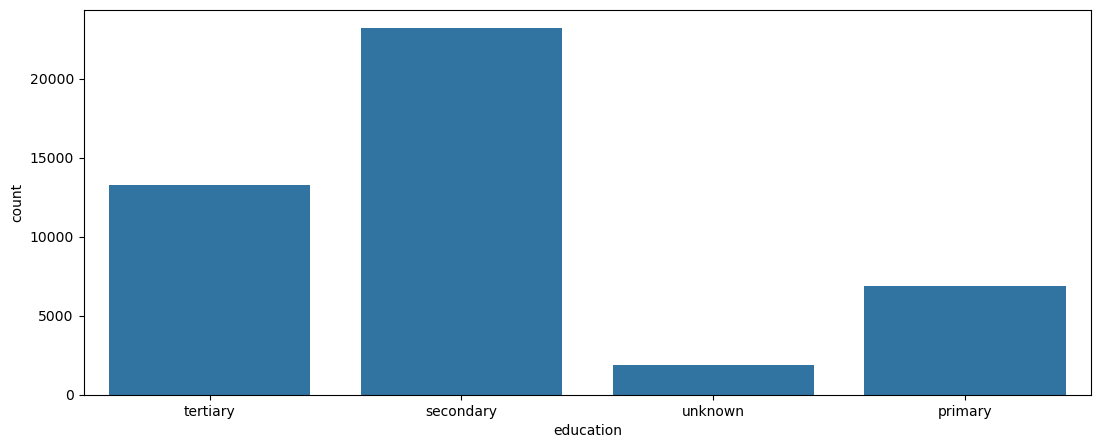

In [50]:
plt.figure(figsize=[13, 5])
sns.countplot(data=dataframe, x='education'); 

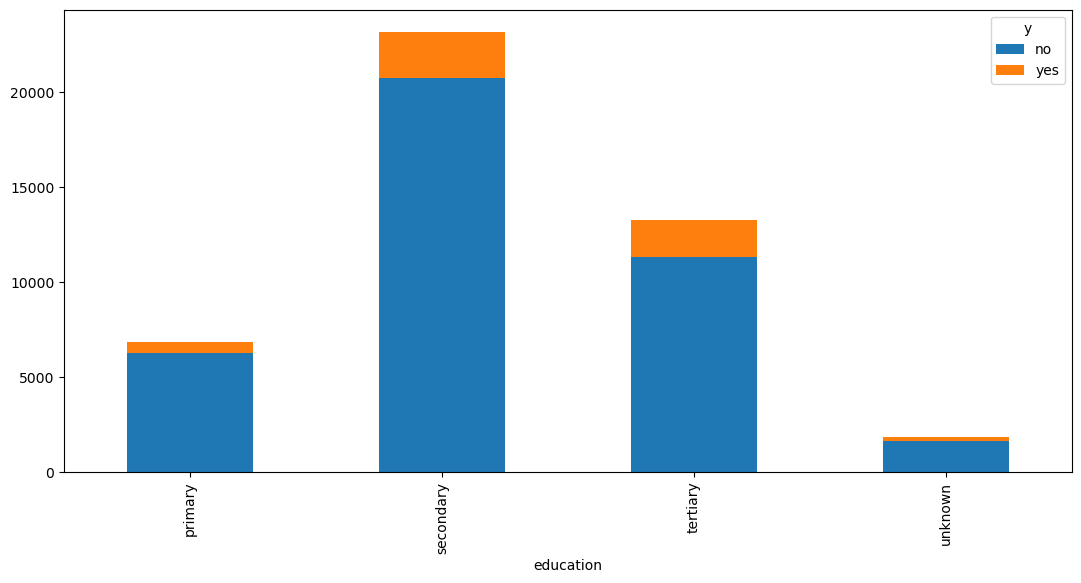

In [228]:
grouped = dataframe.groupby('education')['y'].value_counts().unstack()
grouped.plot(kind='bar', stacked=True, figsize=[13, 6]); 

In [230]:
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100
percentages

y,no,yes
education,,
primary,91.358926,8.641074
secondary,89.432856,10.567144
tertiary,84.986091,15.013909
unknown,86.429725,13.570275


#### Inference 
* secondary level education highest , followed by tertiary and primary
* some unknown values also present

### Question 5 : What proportion of clients have credit in default ? 

In [54]:
dataframe['default']

0        no
1        no
2        no
3        no
4        no
         ..
45211    no
45212    no
45213    no
45214    no
45215    no
Name: default, Length: 45216, dtype: object

In [53]:
dataframe['default'].unique()

array(['no', 'yes'], dtype=object)

In [61]:
dataframe['default'].value_counts()

default
no     44401
yes      815
Name: count, dtype: int64

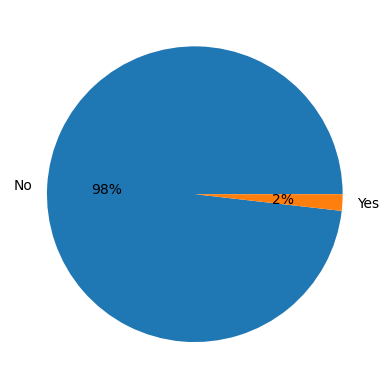

In [69]:
plt.pie(x=dataframe['default'].value_counts(), labels=['No','Yes'], autopct="%0.0f%%"); 

#### Inference 
* Nearly 2% clients have credit in default 

### Question 6 : What is the distribution of average yearly balance among the clients ? 


In [72]:
dataframe['balance']

0        2143
1          29
2           2
3        1506
4           1
         ... 
45211     765
45212    1146
45213     583
45214    2850
45215    1729
Name: balance, Length: 45216, dtype: int64

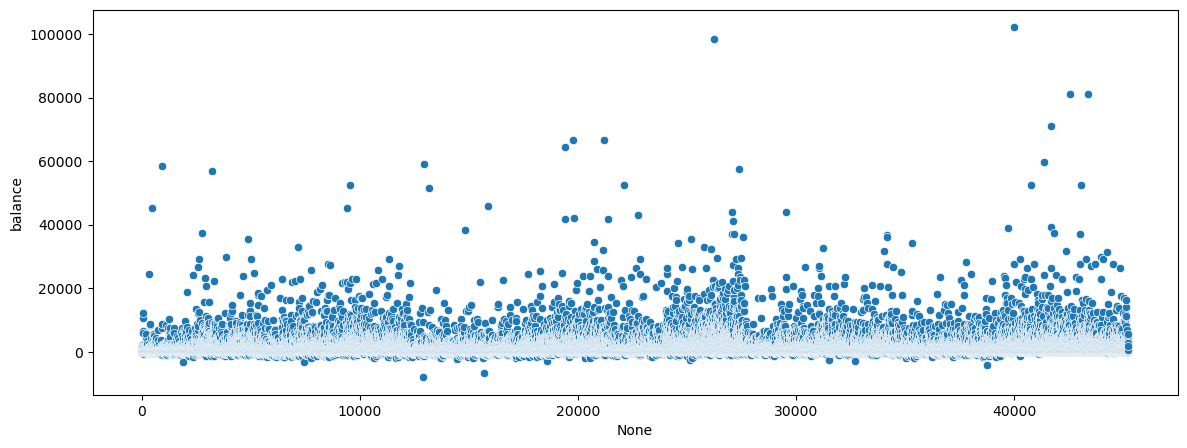

In [88]:
plt.figure(figsize=[14,5])
sns.scatterplot(data=dataframe, x=dataframe.index, y='balance'); 

Removing outliers to get a better view of the distribution 

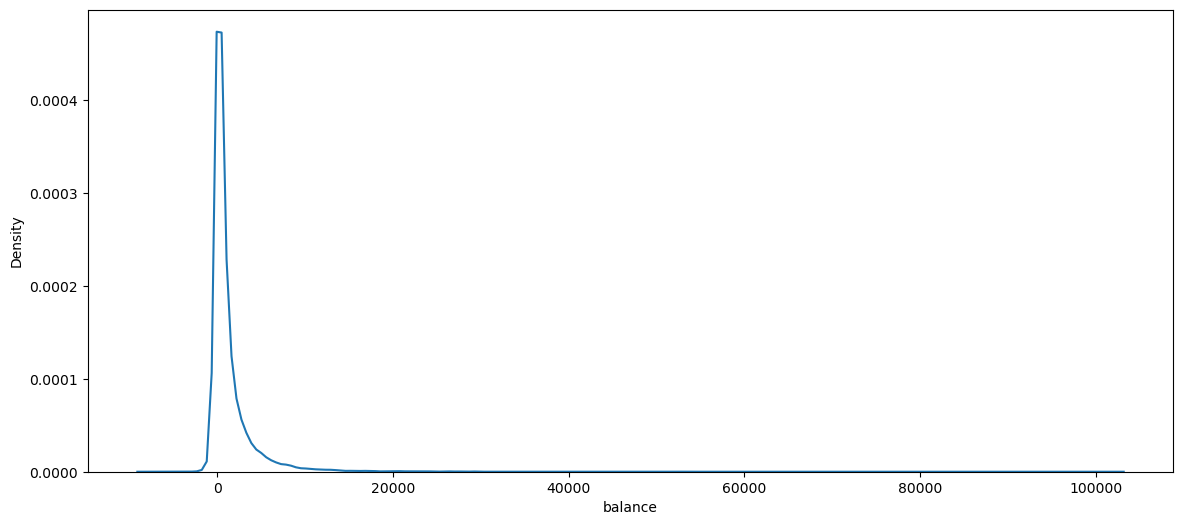

In [87]:
plt.figure(figsize=[14,6])
sns.kdeplot(data=dataframe, x='balance'); 

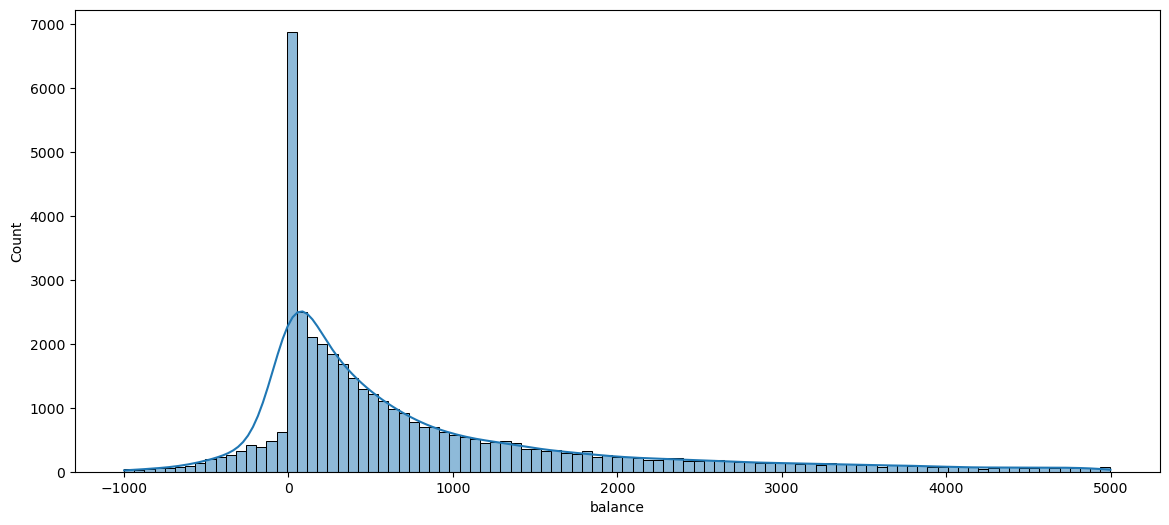

In [132]:
# Magnifying 
plt.figure(figsize=[14,6])
sns.histplot(data=dataframe[(dataframe['balance'] < 5000) & (dataframe['balance'] > -1000)], x='balance', kde=True); 

#### Inference 
* Yearly balance for the maximum number of clients revolves around 0 (and some are also in the negative)

### Question 7 : How many clients have housing loans ? 

In [90]:
# Investigating housing loans 
dataframe['housing']

0        yes
1        yes
2        yes
3        yes
4         no
        ... 
45211     no
45212     no
45213     no
45214     no
45215     no
Name: housing, Length: 45216, dtype: object

In [91]:
dataframe['housing'].value_counts()

housing
yes    25130
no     20086
Name: count, dtype: int64

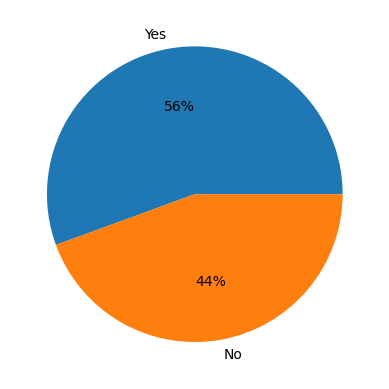

In [93]:
plt.pie(x=dataframe['housing'].value_counts(), labels=['Yes','No'], autopct="%0.0f%%"); 

#### Inference 
* About ~25000 people have housing loans
* About ~20000 people do not have housing loans

### Question 8 : How many clients have personal loans ? 

In [95]:
dataframe['loan']

0         no
1         no
2        yes
3         no
4         no
        ... 
45211     no
45212     no
45213     no
45214     no
45215     no
Name: loan, Length: 45216, dtype: object

In [96]:
dataframe['loan'].value_counts()

loan
no     37972
yes     7244
Name: count, dtype: int64

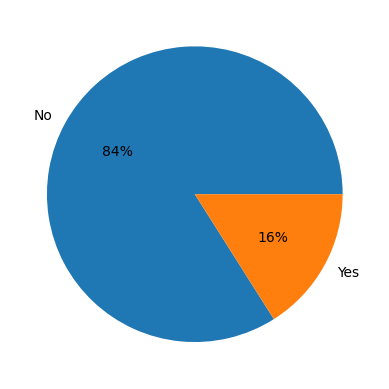

In [98]:
plt.pie(x=dataframe['loan'].value_counts(), labels=['No','Yes'], autopct="%0.0f%%"); 

#### Inference 
* Around ~38000 clients <b>do not</b> have a personal loan
* Around ~7000 clients have personal loan 

### Question 9 : What are the communication types used for contacting clients during the campaign ? 

In [102]:
dataframe['contact']

0         unknown
1         unknown
2         unknown
3         unknown
4         unknown
           ...   
45211    cellular
45212    cellular
45213    cellular
45214    cellular
45215    cellular
Name: contact, Length: 45216, dtype: object

In [101]:
dataframe['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

,contact,y,percent
0,cellular,no,85.066576
1,cellular,yes,14.933424
2,telephone,no,86.579491
3,telephone,yes,13.420509
4,unknown,no,95.929339
5,unknown,yes,4.070661


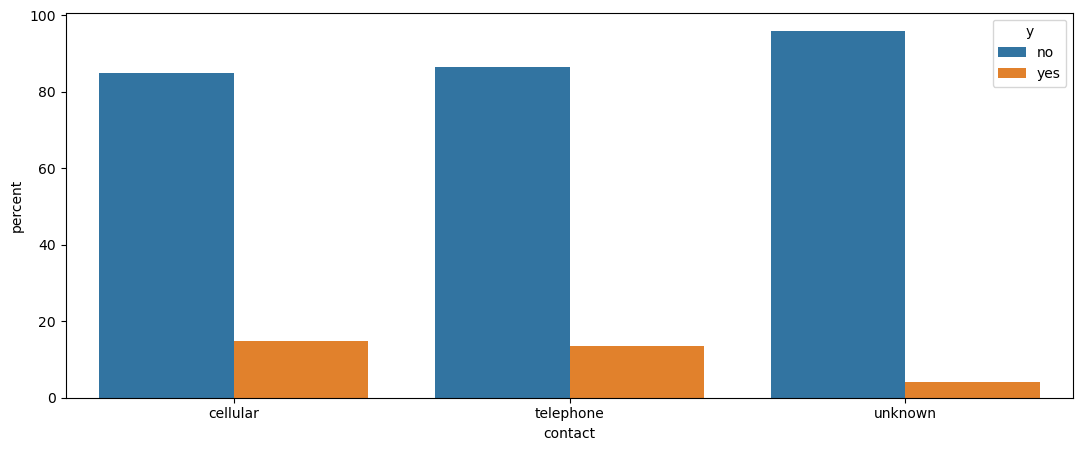

In [238]:
contact_percentages = dataframe.groupby('contact')['y'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
display(contact_percentages)
plt.figure(figsize=[13, 5])
sns.barplot(data=contact_percentages, x='contact', y='percent', hue='y'); 

The communication types used for contacting clients during the campaign are : 
* Cellular
* Telephone
* Another method of communication that is not known ('unknown')

### Question 10 : What is the distribution of the last contact day of the month ? 

In [104]:
dataframe['day']

0         5
1         5
2         5
3         5
4         5
         ..
45211    16
45212    16
45213    17
45214    17
45215    17
Name: day, Length: 45216, dtype: int64

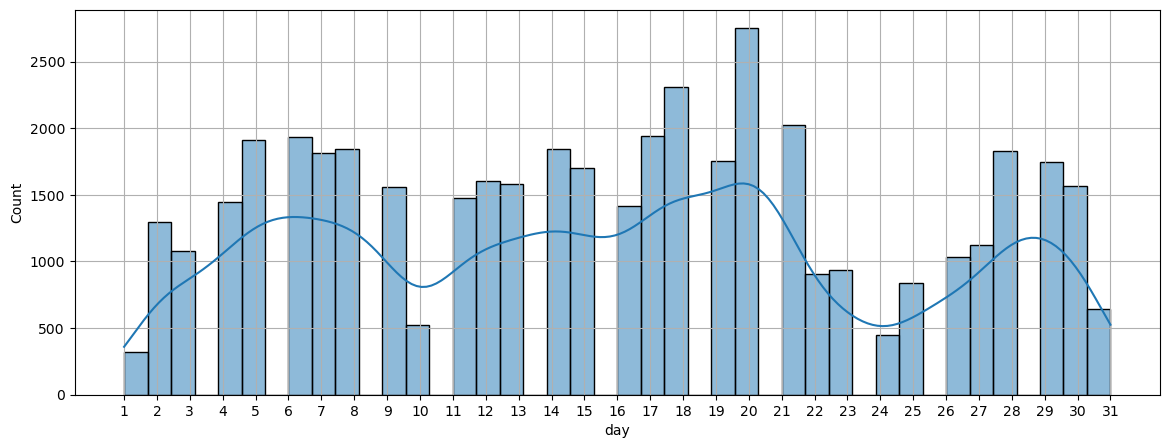

In [259]:
plt.figure(figsize=[14,5])
plt.grid()
sns.histplot(data=dataframe, x='day', kde=True); 
plt.xticks(range(1,32)); 

In [239]:
dataframe.head()

,age,job,marital,marital_status,education,default,balance,housing,loan,contact,day,month,day_month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,married,tertiary,no,2143,yes,no,unknown,5,may,5-May,261,1,-1,0,unknown,no
1,44,technician,single,single,secondary,no,29,yes,no,unknown,5,may,5-May,151,1,-1,0,unknown,no
2,33,entrepreneur,married,married,secondary,no,2,yes,yes,unknown,5,may,5-May,76,1,-1,0,unknown,no
3,47,blue-collar,married,married,unknown,no,1506,yes,no,unknown,5,may,5-May,92,1,-1,0,unknown,no
4,33,unknown,single,single,unknown,no,1,no,no,unknown,5,may,5-May,198,1,-1,0,unknown,no


In [262]:
pd.DataFrame(dataframe['day'].value_counts())

,count
day,
20,2752
18,2308
21,2026
17,1942
6,1932
5,1910
14,1848
8,1842
28,1830


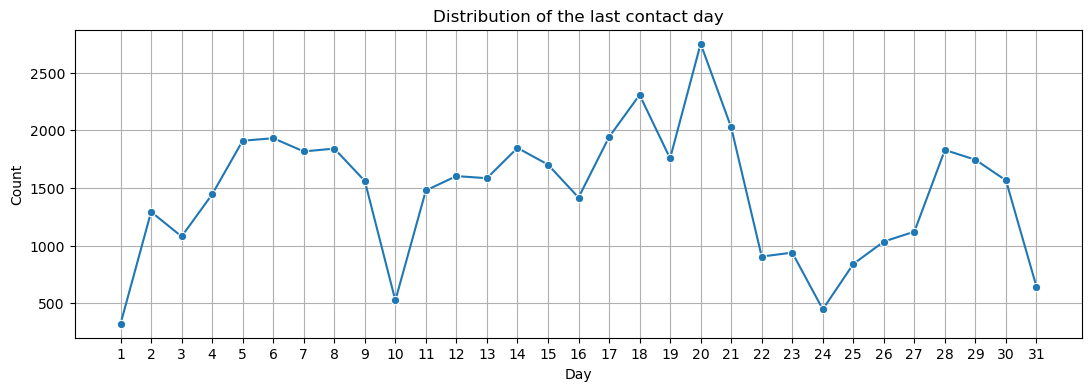

In [264]:
plt.figure(figsize=[13, 4])
sns.lineplot(data=pd.DataFrame(dataframe['day'].value_counts()), x='day', y='count', marker='o'); 
plt.grid()
plt.title("Distribution of the last contact day")
plt.ylabel("Count")
plt.xlabel("Day")
plt.xticks(range(1,32)); 


#### Inference 
* Last contact day of the month usually came around the 20th day of the month
* Followed by either 5-10 days or >26

### Question 11 : How does the last contact month vary among the clients ? 

In [111]:
dataframe['month']

0        may
1        may
2        may
3        may
4        may
        ... 
45211    nov
45212    nov
45213    nov
45214    nov
45215    nov
Name: month, Length: 45216, dtype: object

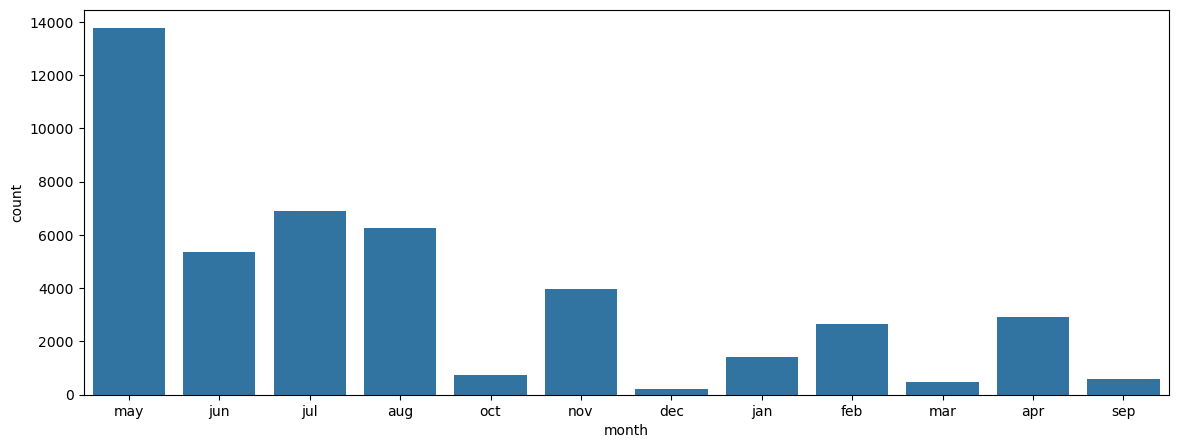

In [113]:
plt.figure(figsize=[14, 5])
sns.countplot(data=dataframe, x='month'); 

#### Inference 
* The month with the maximum number of last contacts was 'May' (by some margin)
* Followed by tenure between July-August
* October , December , March and September show the lowest last contacts 

### Question 12 : What is the distribution of the duration of the last contact ? 

In [116]:
dataframe['duration']

0        261
1        151
2         76
3         92
4        198
        ... 
45211    238
45212    212
45213    226
45214    300
45215    456
Name: duration, Length: 45216, dtype: int64

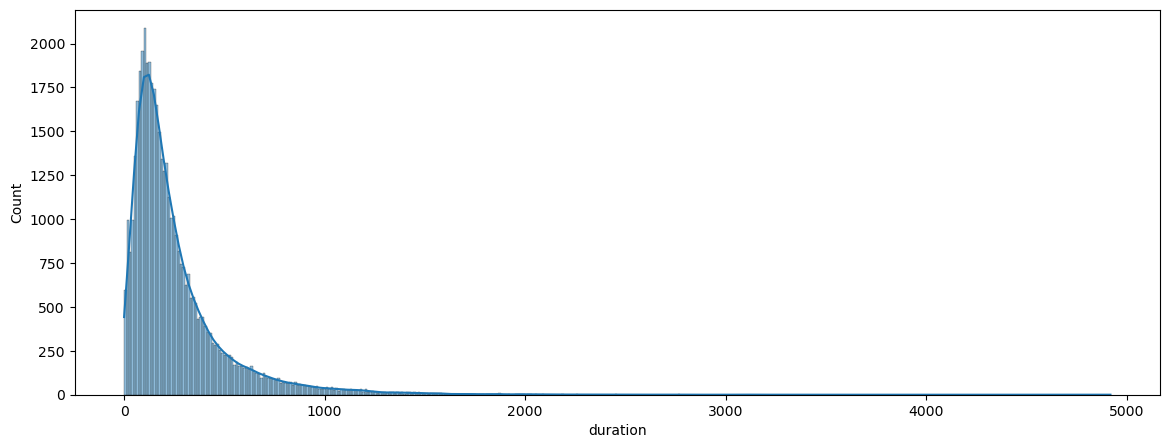

In [121]:
plt.figure(figsize=[14, 5])
sns.histplot(data=dataframe, x='duration', kde=True); 

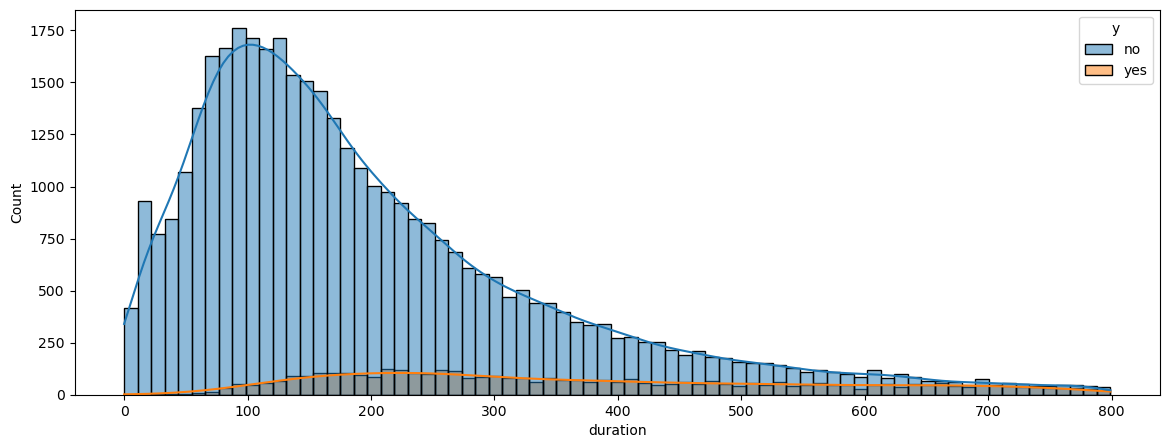

In [269]:
# Magnifying 
plt.figure(figsize=[14, 5])
sns.histplot(data=dataframe[dataframe['duration']<800], x='duration', kde=True, hue='y'); 

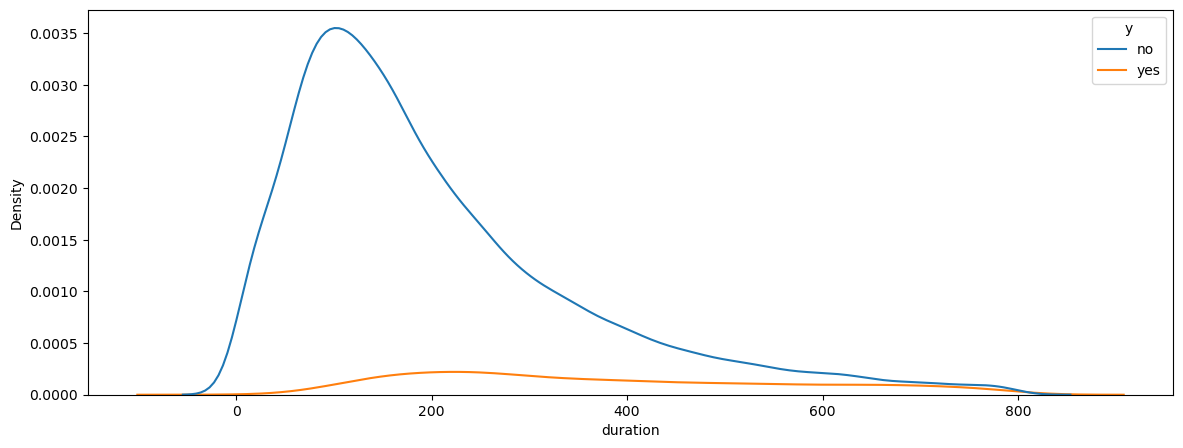

In [267]:
# Magnifying 
plt.figure(figsize=[14, 5])
sns.kdeplot(data=dataframe[dataframe['duration']<800], x='duration', hue='y'); 

#### Inference 
* The duration majorly lasts between 50 - 250 days

### Question 13 : How many contacts were performed during the campaign for each client ? 

In [135]:
dataframe['campaign']

0        1
1        1
2        1
3        1
4        1
        ..
45211    1
45212    1
45213    1
45214    1
45215    2
Name: campaign, Length: 45216, dtype: int64

In [134]:
dataframe['campaign'].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44])

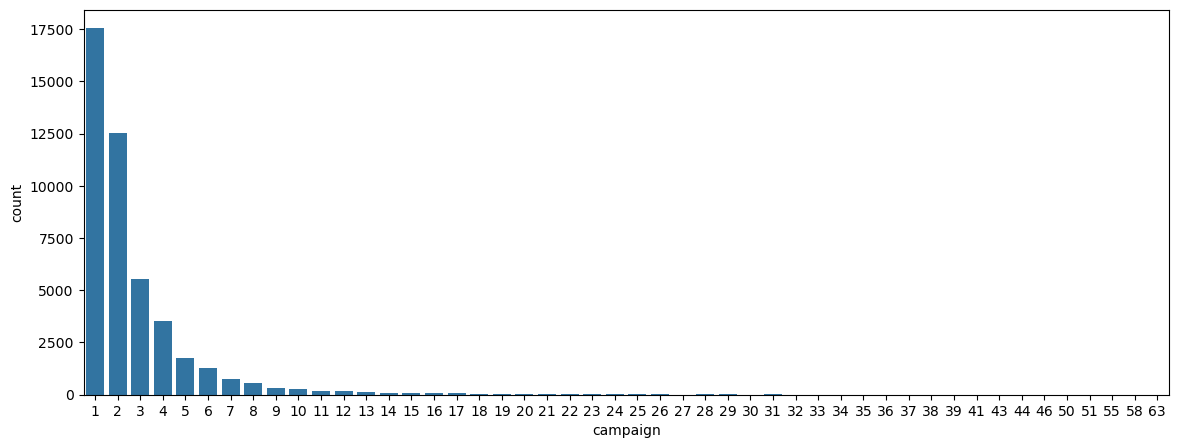

In [141]:
plt.figure(figsize=[14,5])
sns.countplot(data=dataframe, x='campaign');   

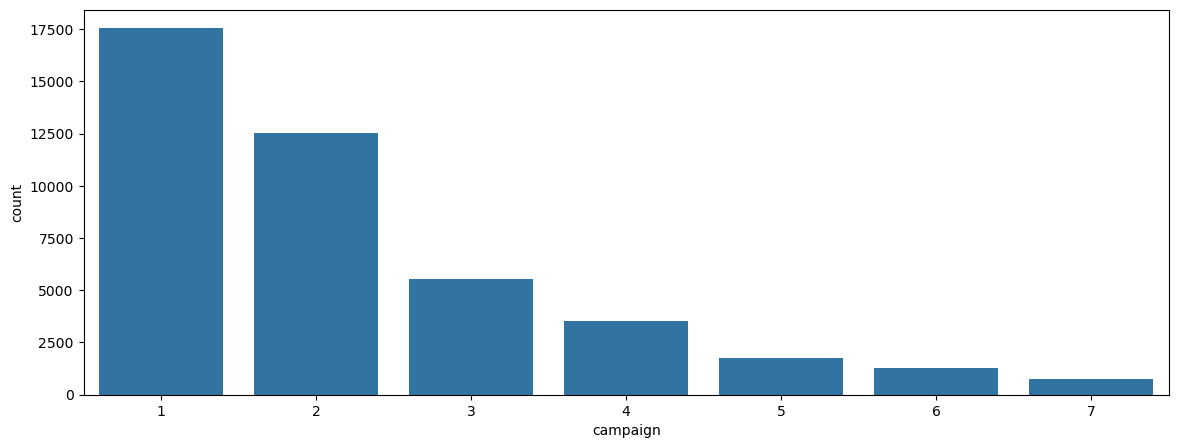

In [139]:
plt.figure(figsize=[14,5])
sns.countplot(data=dataframe[dataframe['campaign'] < 8], x='campaign');  

#### Inference 
* Maximum number of campaigns stands at 1 and the client number keeps on decreasing as the campaigns increase

### Question 14 : What is the distribution of the number of days passed since the client was last contacted from a previous campaign ? 

In [147]:
# dataframe['pdays'].unique()
dataframe['pdays'].nunique()

559

In [270]:
dataframe['pdays'].describe()

count    45216.000000
mean        40.202428
std        100.128248
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

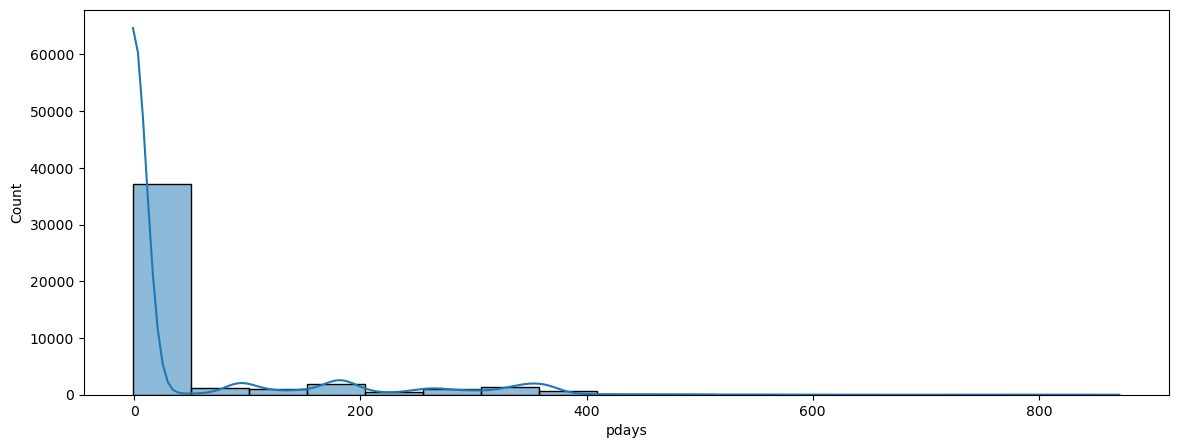

In [156]:
plt.figure(figsize=[14, 5])
sns.histplot(data=dataframe, x='pdays', kde=True); 

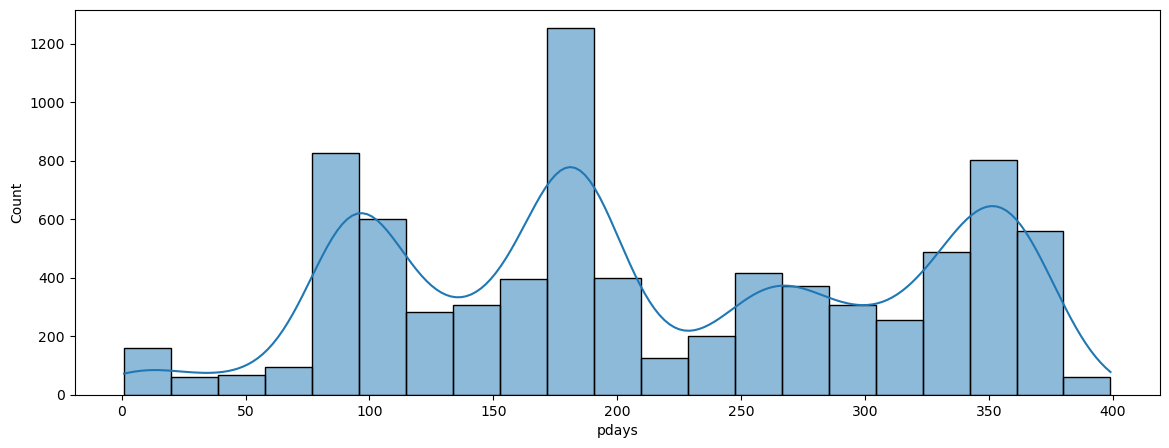

In [271]:
plt.figure(figsize=[14, 5])
sns.histplot(data=dataframe[(dataframe['pdays'] > 0) & (dataframe['pdays'] < 400)], x='pdays', kde=True); 

### Question 15 : How many contacts were performed before the current campaign for each client?

In [159]:
dataframe['previous'].nunique()

41

In [209]:
dataframe['previous'].value_counts()

previous
0      36956
1       2772
2       2106
3       1142
4        715
5        459
6        278
7        205
8        130
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
24         5
27         5
21         4
29         4
25         4
30         3
38         2
37         2
26         2
28         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: count, dtype: int64

In [272]:
dataframe['previous'].describe()

count    45216.000000
mean         0.580657
std          2.303778
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

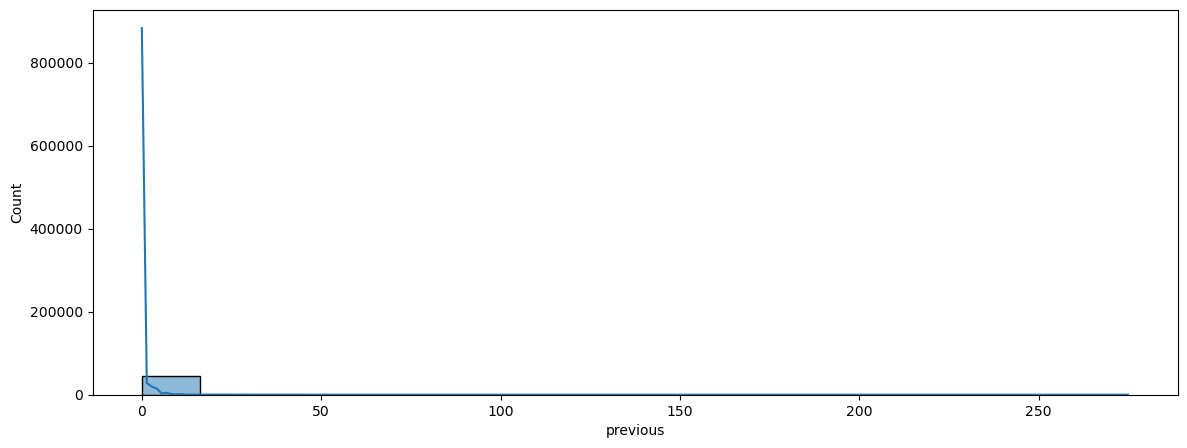

In [162]:
plt.figure(figsize=[14, 5])
sns.histplot(data=dataframe, x='previous', kde=True); 

#### Inference 
* Majority have no contacts performed before the start of the current campaign
* Number of clients decreasing as the count of the contacts performed before the current campaign starts increasing 

### Question 16 : What were the outcomes of the previous marketing campaigns?

In [165]:
dataframe['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

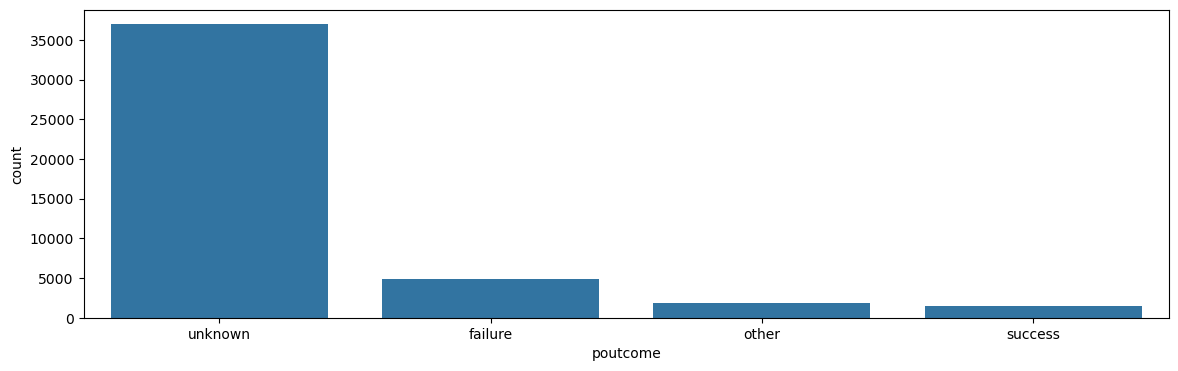

In [169]:
plt.figure(figsize=[14, 4])
sns.countplot(data=dataframe, x='poutcome'); 

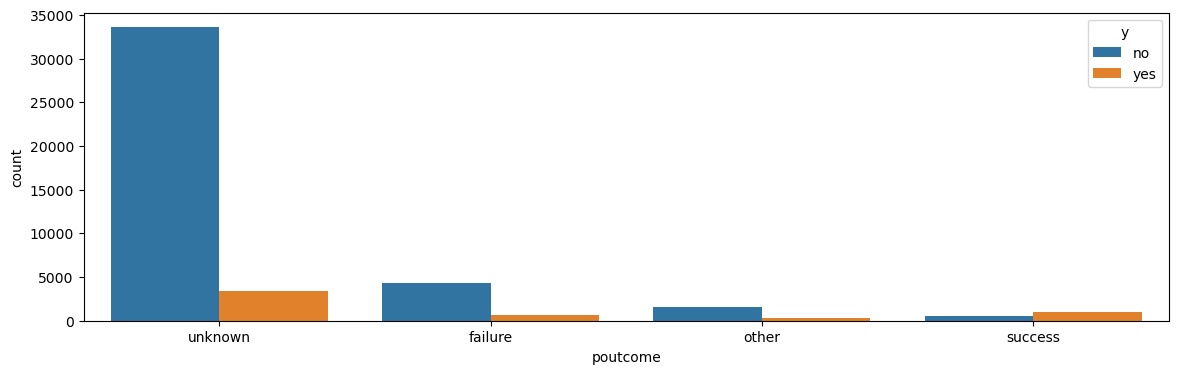

In [273]:
plt.figure(figsize=[14, 4])
sns.countplot(data=dataframe, x='poutcome', hue='y'); 

#### Inference 
* Majority of the outcomes are unknown
* Rate of failure higher than success rate

### Question 17 : What is the distribution of clients who subscribed to a term deposit vs. those who did not?

In [171]:
dataframe['y'].value_counts()

y
no     39922
yes     5294
Name: count, dtype: int64

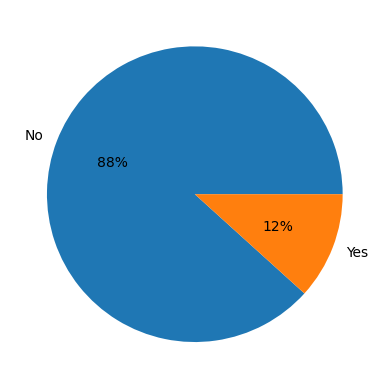

In [172]:
plt.pie(x=dataframe['y'].value_counts(), labels=['No','Yes'], autopct="%0.0f%%"); 

### Question 18 : Are there any correlations between different attributes and the likelihood of subscribing to a term deposit?

In [210]:
dataframe.select_dtypes(include=['object']).columns

Index(['job', 'marital', 'marital_status', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_month', 'poutcome', 'y'],
      dtype='object')

In [211]:
dataframe.select_dtypes(exclude=['object']).columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [212]:
# Converting categorical data into string 

In [213]:
encoded_data = pd.get_dummies(dataframe, columns=dataframe.select_dtypes(include=['object']).columns.tolist())
encoded_data.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_status_divorced,marital_status_married,marital_status_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_month_1-Apr,day_month_1-Aug,day_month_1-Feb,day_month_1-Jul,day_month_1-Jun,day_month_1-Mar,day_month_1-Oct,day_month_1-Sep,day_month_10-Aug,day_month_10-Dec,day_month_10-Feb,day_month_10-Jul,day_month_10-Jun,day_month_10-Mar,day_month_10-May,day_month_10-Nov,day_month_10-Oct,day_month_10-Sep,day_month_11-Aug,day_month_11-Dec,day_month_11-Feb,day_month_11-Jan,day_month_11-Jul,day_month_11-Jun,day_month_11-Mar,day_month_11-May,day_month_11-Nov,day_month_11-Oct,day_month_11-Sep,day_month_12-Apr,day_month_12-Aug,day_month_12-Dec,day_month_12-Feb,day_month_12-Jan,day_month_12-Jul,day_month_12-Jun,day_month_12-Mar,day_month_12-May,day_month_12-Nov,day_month_12-Oct,day_month_13-Apr,day_month_13-Aug,day_month_13-Dec,day_month_13-Feb,day_month_13-Jan,day_month_13-Jul,day_month_13-Jun,day_month_13-Mar,day_month_13-May,day_month_13-Nov,day_month_13-Oct,day_month_13-Sep,day_month_14-Apr,day_month_14-Aug,day_month_14-Dec,day_month_14-Jan,day_month_14-Jul,day_month_14-Jun,day_month_14-May,day_month_14-Nov,day_month_14-Oct,day_month_14-Sep,day_month_15-Apr,day_month_15-Dec,day_month_15-Feb,day_month_15-Jan,day_month_15-Jul,day_month_15-Jun,day_month_15-Mar,day_month_15-May,day_month_15-Nov,day_month_15-Oct,day_month_15-Sep,day_month_16-Apr,day_month_16-Aug,day_month_16-Dec,day_month_16-Feb,day_month_16-Jul,day_month_16-Jun,day_month_16-Mar,day_month_16-May,day_month_16-Nov,day_month_16-Oct,day_month_16-Sep,day_month_17-Apr,day_month_17-Aug,day_month_17-Dec,day_month_17-Feb,day_month_17-Jul,day_month_17-Jun,day_month_17-Mar,day_month_17-May,day_month_17-Nov,day_month_17-Oct,day_month_17-Sep,day_month_18-Aug,day_month_18-Dec,day_month_18-Feb,day_month_18-Jan,day_month_18-Jul,day_month_18-Jun,day_month_18-Mar,day_month_18-May,day_month_18-Nov,day_month_18-Oct,day_month_18-Sep,day_month_19-Apr,day_month_19-Aug,day_month_19-Feb,day_month_19-Jul,day_month_19-Jun,day_month_19-Mar,day_month_19-May,day_month_19-Nov,day_month_19-Oct,day_month_2-Apr,day_month_2-Aug,day_month_2-Dec,day_month_2-Feb,day_month_2-Jul,day_month_2-Jun,day_month_2-Mar,day_month_2-Nov,day_month_2-Oct,day_month_2-Sep,day_month_20-Apr,day_month_20-Aug,day_month_20-Jul,day_month_20-Jun,day_month_20-Mar,day_month_20-May,day_month_20-Nov,day_month_20-Oct,day_month_20-Sep,day_month_21-Apr,day_month_21-Aug,day_month_21-Dec,day_month_21-Feb,day_month_21-Jul,day_month_21-Jun,day_month_21-May,day_month_21-Nov,day_month_21-Oct,day_month_21-Sep,day_month_22-Apr,day_month_22-Aug,day_month_22-Dec,day_month_22-Feb,day_month_22-Jan,day_month_22-Jul,day_month_22-Jun,day_month_22-Mar,day_month_22-May,day_month_22-Nov,day_month_22-Oct,day_month_22-Sep,day_month_23-Apr,day_month_23-Aug,day_month_23-Dec,day_month_23-Feb,day_month_23-Jul,day_month_23-Jun,day_month_23-Mar,day_month_23-May,day_month_23-Oct,day_month_23-Sep,day_month_24-Apr,day_month_24-Aug,day_month_24-Dec,day_month_24-Feb,day_month_24-Jul,day_month_24-Jun,day_month_24-Mar,day_month_24-May,day_month_24-Nov,day_month_24-Oct,day_month_24-Sep,day_month_25-Aug,day_month_25-Feb,day_month_25-Jan,day_month_25-Jul,day_month_25-Jun,day_month_25-Mar,day_month_25-May,day_month_25-Nov,day_month_25-Oct,day_month_25-Sep,day_month_26-Apr,day_month_26-Aug,day_month_26-Feb,day_month_26-Jan,day_month_26-Jul,day_month_26-Jun,day_month_26-Mar,day_month_26-May,day_month_26-Oct,day_month_26-Sep,day_month_27-Apr,day_mo

In [214]:
corr_data = encoded_data.corr()['y_yes'].sort_values(ascending=False)

In [215]:
corr_data[:10]

y_yes               1.000000
duration            0.394387
poutcome_success    0.307083
housing_no          0.139445
contact_cellular    0.136036
month_mar           0.129371
month_oct           0.128439
month_sep           0.123099
pdays               0.103699
previous            0.093576
Name: y_yes, dtype: float64

In [216]:
corr_data[-10:]

marital_married          -0.060216
marital_status_married   -0.060216
loan_yes                 -0.068289
job_blue-collar          -0.072211
campaign                 -0.073294
month_may                -0.102656
housing_yes              -0.139445
contact_unknown          -0.151062
poutcome_unknown         -0.167284
y_no                     -1.000000
Name: y_yes, dtype: float64

#### Inference 
* Terms for subscribing correlate most with :
    - 'duration' : Duration of the last contact with the client
    - 'poutcome' : Outcome of the previous marketing campaign
    - 'housing' : Whether the client has a housing loan or not
    - etc. 